In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [55]:
data_dir = 'data' 

In [56]:
# images in stop
os.listdir(os.path.join(data_dir, 'stop'))

['images109.jpg',
 'Stop-Sign.jpg',
 'images177.jpg',
 'stop-sign-modern-floor-marking-signs-product-121_1024x1024.jpg',
 'shouts-stop-sign.jpg',
 'FRR380.jpg',
 'image5.jpeg',
 'images176.jpg',
 'images111.jpg',
 'images84.jpg',
 'images95.jpg',
 'images159.jpg',
 'images11.jpg',
 'image11.jpeg',
 'stop.jpg',
 'images66.jpg',
 'images24.jpg',
 'E6-043-12x12-3430-040.jpg',
 'images53.jpg',
 'images94.jpg',
 'image12.jpeg',
 'images17.jpg',
 'images83.jpg',
 'images161.jpg',
 'images138.jpg',
 'images55.jpg',
 'candlepower-stop-sign.jpg',
 'images43.jpg',
 'images168.jpg',
 'hand-stop-sign.png',
 '01_stopsign_Stop-Signs-Used-to-Be-YellowE28094More-Recently-Than-You-Think_376238113_Usa-Pyon.jpg',
 'STOP-AHEAD__48779.1606241353.jpg',
 'stop-2717058__340.png',
 'flat-design-enter-sign-design_23-2149277710.jpg',
 'images141.jpg',
 'img_4973-1fff64cb2be877fb9678bd9a52bee4ea1e5f03ca.jpg',
 'stop-arret-solution-ticket.jpg',
 'Stop-Yellow.jpg',
 'Stop-Sign-scaled.jpeg',
 'images78.jpg',
 'image

In [57]:
# images in warning
os.listdir(os.path.join(data_dir, 'warning'))

['image26.png',
 'blank-warning-sign-warning-empty-sign-caution-yellow-illustration-eps-10-vector.jpg',
 'images48.jpg',
 'image5.jpeg',
 'warning-danger-caution-signs-hero.jpg',
 'images11.jpg',
 'images61.jpg',
 'area-message-box-sticker-label-object-goods-commodity-collection_521317-1153.jpg',
 'blank-yellow-warning-sign-isolated-vector-1932570.jpg',
 'images34.jpg',
 '11022057.jpg',
 'free-grunge-warning-sign-vector-s4crw.jpg',
 'images17.jpg',
 '12PS46-W6003_sign_warning_1.jpg',
 'dds-a3-sign_cqr9-ot.png',
 'images43.jpg',
 'SW002-2.jpg',
 'Warning_Signs_Page_1.jpg',
 'warning-sign-icon-transparent-background-free-png.png',
 'W30225-Design-a-Sign.png',
 'fbd1e95fc924fd69a44cf8fb27c47683.jpg',
 'Caution-This-machine-is-automatic-and-may-start-without-warning-sign.jpg',
 '86f2341d76ba2fbec6fc722c888b66a0.jpg',
 'ws.jpg',
 'Warning_Sign-5719-487.jpg',
 'images69.jpg',
 'images35.jpg',
 '3069-p3069_0.jpg',
 'warning-sign-construction-symbols-design-vector-30495774.jpg',
 'warning-sign

In [58]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [59]:
# loop through images by class and if there is an error remove from folder
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [60]:
# convert image to numpy array
img = cv2.imread(os.path.join('data','stop','images29.jpg'))
img.shape

(180, 280, 3)

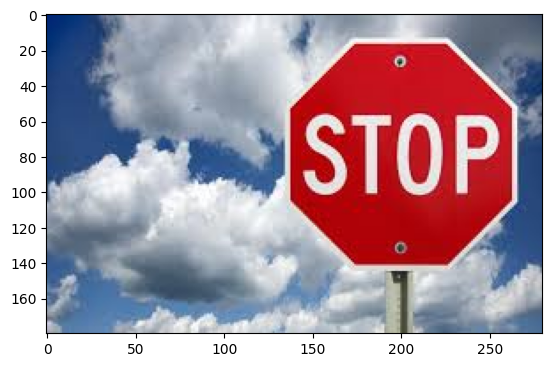

In [61]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Load Dataset

In [95]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 319 files belonging to 2 classes.


In [96]:
data_iter = data.as_numpy_iterator()

In [97]:
batch = data_iter.next()

In [98]:
batch[0].shape

(32, 256, 256, 3)

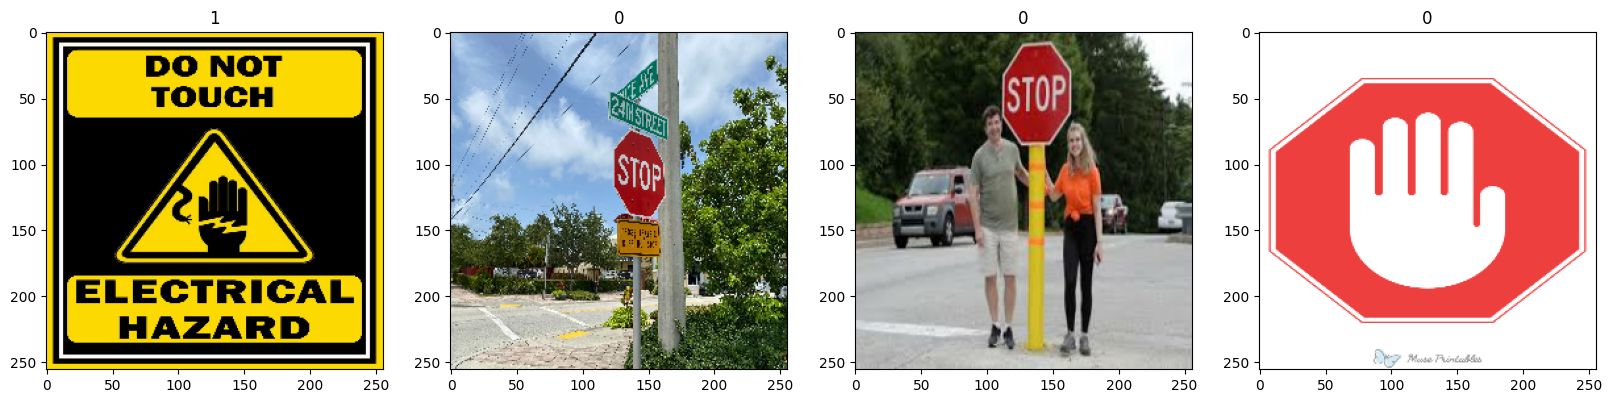

In [99]:
# plot our first 4 images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Processing our Data

In [100]:
# normalising our data

data = data.map(lambda x,y: (x/255, y))
# data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

In [101]:
len(data)

10